In [3]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools



In [4]:
data_raw = pd.read_csv('tested_molecules.csv')
data_raw 

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


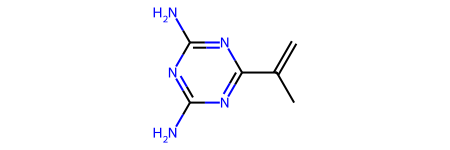

In [5]:
a_molecule = data_raw['SMILES'][0]
one_molecule = Chem.MolFromSmiles(a_molecule)
one_molecule	

In [6]:
df_molecules = pd.DataFrame(data_raw['SMILES'])

df_molecules['Molecule'] = df_molecules['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
df_molecules['Num_Aliphatic_Rings'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumAliphaticRings(x))
df_molecules['Fraction_CSP3'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcFractionCSP3(x))
df_molecules['Num_Aromatic_Rings'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumAromaticRings(x))
df_molecules['Num_Rings'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumRings(x))
df_molecules['Num_H_Acceptors'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumHBA(x))
df_molecules['Num_H_Donors'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumHBD(x))
df_molecules['Num_Atoms'] = df_molecules['Molecule'].apply(lambda x: x.GetNumAtoms())
df_molecules['Num_Bonds'] = df_molecules['Molecule'].apply(lambda x: x.GetNumBonds())
df_molecules['Molecular_Weight'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcExactMolWt(x))
df_molecules['LogP'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcCrippenDescriptors(x)[0])
df_molecules['TPSA'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcTPSA(x))
df_molecules['Num_Rotatable_Bonds'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumRotatableBonds(x))
df_molecules['Num_Heavy_Atoms'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumHeavyAtoms(x))
#df_molecules['Num_Chiral_Centers'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumChiralCenters(x))
#df_molecules['Molar Volume'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcMolVolume(x))
df_molecules['Ring_Count'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcNumRings(x))
#df_molecules['Molar refractivity'] = df_molecules['Molecule'].apply(lambda x: Chem.rdMolDescriptors.CalcMolMR(x))
df_molecules

,SMILES,Molecule,Num_Aliphatic_Rings,Fraction_CSP3,Num_Aromatic_Rings,Num_Rings,Num_H_Acceptors,Num_H_Donors,Num_Atoms,Num_Bonds,Molecular_Weight,LogP,TPSA,Num_Rotatable_Bonds,Num_Heavy_Atoms,Ring_Count
0,C=C(C)c1nc(N)nc(N)n1,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.166667,1,1,5,2,11,11,151.085795,0.06910,90.71,1,11,1
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.153846,2,2,3,0,17,18,250.039672,3.23272,39.44,3,17,2
2,C=CCNC(=O)CCCC(=O)NCC=C,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.454545,0,0,2,2,15,14,210.136828,0.76110,58.20,8,15,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.166667,2,2,4,0,17,18,232.084792,0.55792,58.17,3,17,2
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.200000,1,1,4,0,15,15,226.050905,1.03540,44.00,4,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,2,0.190476,3,5,5,1,27,31,362.126657,3.81750,63.94,4,27,5
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,0,0.000000,4,4,4,1,25,28,374.042773,3.42180,64.72,4,25,4
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,1,0.263158,3,4,4,2,25,28,355.132015,1.89390,53.69,3,25,4
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000271490...,1,0.222222,3,4,5,0,23,26,322.125218,3.53170,32.26,3,23,4


In [10]:
print('hello test of my branch')
print('test nog een keertje')
print('ik ik ik ')

hello test of my branch
test nog een keertje
branchbranch


## Code deel 5 ##

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem import rdMolDescriptors
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, make_scorer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:

data_raw = pd.read_csv('tested_molecules.csv')

# Create a new dataframe with the SMILES strings from untested molecules + descriptors (gelijk aan train data)
unknown_molucules = pd.read_csv('untested_molecules.csv')
df_unknown_mol = pd.DataFrame(unknown_molucules['SMILES'])
#etc.....

In [ ]:
X_unknown_data = #Waardes uit df

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_unknown_data_scaled = scaler.transform(X_unknown_data)

In [ ]:
# Ze staan allemaal maar adhv de training de beste manier kiezen en de rest kan dan weg.
rfc_predictions = rfc.predict(X_unknown_data)
knn_predictions = knn.predict(X_unknown_data)
gbc_predictions = gbc.predict(X_unknown_data)

In [ ]:
#En dan dus nog de probabilities etc printen wat we belangerijk vinden